In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [15]:
df_DE_Can = df[(df['job_title_short'] == 'Data Engineer') & (df['job_country'] == 'Canada')].copy()

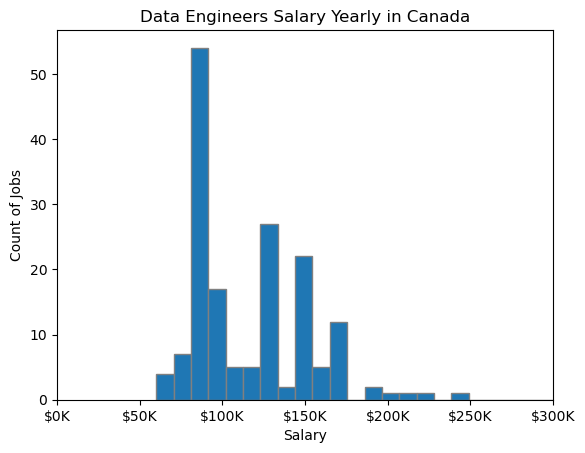

In [22]:
df_DE_Can['salary_year_avg'].plot(kind='hist', bins=30, edgecolor='gray')
plt.xlim(0, 300000)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos:f'${int(y/1000)}K'))

plt.title('Data Engineers Salary Yearly in Canada')
plt.xlabel('Salary')
plt.ylabel('Count of Jobs')
plt.show()